# Health Insurance Cost Prediction 

In [1]:
import os 
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
import sklearn.linear_model as linear_model
import sklearn.preprocessing as preprocessing 

In [2]:
insurance = pd.read_csv("insurance.csv")

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance.agg([min, max]).T

,min,max
age,18,64
sex,female,male
bmi,15.96,53.13
children,0,5
smoker,no,yes
region,northeast,southwest
charges,1121.87,63770.4


In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='age', ylabel='charges'>

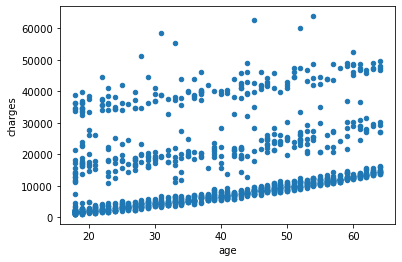

In [7]:
insurance.plot(kind = "scatter", x = 'age', y = 'charges')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

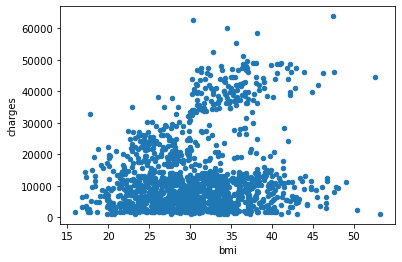

In [8]:
insurance.plot(kind = "scatter", x = 'bmi', y = 'charges')

<AxesSubplot:xlabel='children', ylabel='charges'>

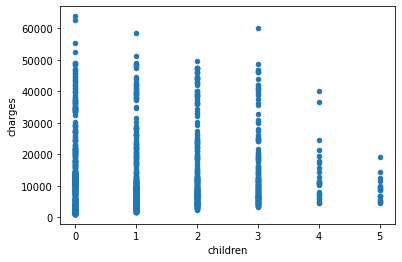

In [9]:
insurance.plot(kind = "scatter", x = 'children', y = 'charges')

<AxesSubplot:>

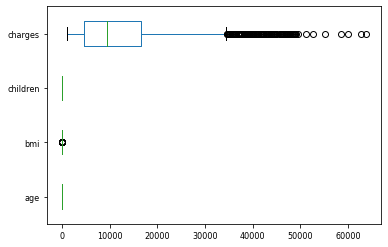

In [10]:
insurance.boxplot(grid = False, vert = False, fontsize = 8)

In [11]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [12]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
insurance['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='charges'>

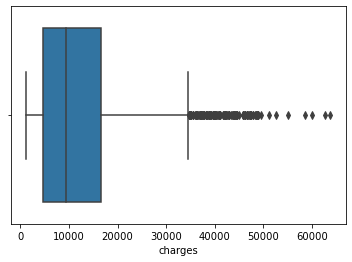

In [14]:
sns.boxplot(x = insurance['charges'])

In [15]:
insurance.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [16]:
insurance.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [17]:
insurance.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


<AxesSubplot:>

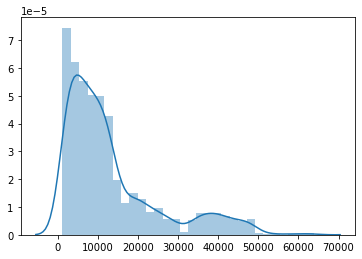

In [18]:
sns.distplot(insurance[['charges']])

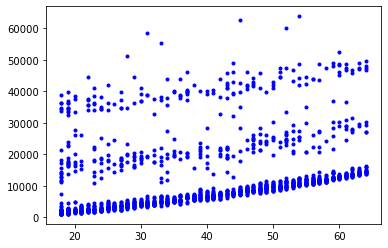

In [7]:
plt.plot(insurance['age'].values, insurance['charges'], 'b.')

In [8]:
rng = np.random.default_rng()

In [10]:
train_ind = rng.choice(insurance.index, round(len(insurance)*0.6))
train_set = insurance.iloc[train_ind]

In [11]:
X_num = train_set[['age','bmi','children']].values
X_cat = train_set[['sex','smoker','region']].values

In [12]:
y = train_set['charges'].values

In [16]:
model = linear_model.LinearRegression()
model.fit(X_num, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
cat_encoder = preprocessing.OneHotEncoder()

In [18]:
cat_encoder.fit(X_cat)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [19]:
X_cat_2 = cat_encoder.transform(X_cat).toarray()

In [20]:
model2 = linear_model.LinearRegression()

In [21]:
model2.fit(X_cat_2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(model2.predict(X_cat_2))

[ 9299.19750183 32323.21029151  9299.19750183  9155.42959675
  9155.42959675  9155.42959675  8252.8484701   8252.8484701
  8679.16743927  8109.08056503  8679.16743927 32799.472449
 31324.78986836  8535.39953419  8109.08056503  7536.97911105
  8679.16743927  7536.97911105  9299.19750183 31324.78986836
  9299.19750183  9299.19750183  8679.16743927  8109.08056503
  8252.8484701   7680.74701612  8535.39953419  7536.97911105
  7680.74701612  8252.8484701   8252.8484701   9155.42959675
  8679.16743927  8109.08056503  8109.08056503  8252.8484701
  9155.42959675  8109.08056503  9155.42959675  7536.97911105
  8252.8484701  32799.472449   31181.02196329  8679.16743927
  8109.08056503  9299.19750183  8109.08056503 32799.472449
  8252.8484701   7680.74701612  8109.08056503  9299.19750183
  7536.97911105  9155.42959675  8252.8484701   8679.16743927
  8679.16743927  8535.39953419  7536.97911105  9299.19750183
  8679.16743927  8109.08056503  8109.08056503  8109.08056503
  7536.97911105  7536.97911105

In [23]:
X_cat_2[0:5,:]

array([[1., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0.]])

In [24]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [25]:
X_re = np.concatenate([X_num,X_cat_2],axis=1)

model_re = linear_model.LinearRegression()

model_re.fit(X_re, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
model_re.predict(X_re)

array([12862.98578155, 31501.33667268,  7269.75515512,  6836.03881246,
        8897.03357019,  9029.3645285 , 12338.05456311,  3532.16184246,
        9931.21007987,  2236.5111201 , 12368.43553231, 34516.79069151,
       32558.68609373, 15620.09379661,  6392.18419529, 11782.6936503 ,
        7987.25834802,  8582.4294476 ,  9728.62191246, 29450.43456523,
        7635.09656018,  7462.75735471, 10401.39008024, 11842.61509194,
        9493.27578959,  8314.68490746, 15434.04954534,    54.1275345 ,
       12253.6579622 ,  5325.89918156, 11643.25708973, 16344.19796413,
        6595.14969544, 12403.49120896,  5899.05644407,  5332.12657475,
       10729.42711076,  4406.92646528,  6067.1215026 , 13599.19657444,
        2814.93821436, 31181.96436013, 26430.32908107, 12084.2997832 ,
        8310.0797731 ,  7152.36400397,  2236.5111201 , 37961.3276572 ,
        7758.98362535,  3671.87052169,  3879.001461  , 17056.85716003,
       13603.27388513,  9371.17359692, 11413.01750771,  7162.91018434,
      

In [27]:
y - model_re.predict(X_re)

array([-2.48150708e+03, -1.19065270e+04, -1.08545576e+03, -8.69151412e+02,
        5.58129658e+03,  7.59501372e+02, -4.97279513e+02,  1.37424781e+03,
       -2.88118878e+03, -1.49466701e+01, -1.99752298e+03,  9.98460751e+03,
       -1.00800861e+04, -4.05379325e+03, -1.13071475e+03, -2.21966465e+03,
       -6.62210148e+02, -8.55575448e+02, -2.04595191e+03,  5.38843843e+03,
       -5.88374360e+02, -1.48837265e+03,  1.45136562e+04, -1.57315509e+03,
       -3.50375214e+03, -4.90436091e+03,  5.27497079e+03,  1.18813247e+03,
        7.88263038e+02, -1.37293316e+01,  5.79641210e+02, -1.92591756e+03,
        1.23083417e+04, -1.80185896e+03, -2.03220124e+03, -3.19405587e+03,
       -1.35152241e+03,  1.75775441e+04,  2.05355697e+02, -3.27399057e+03,
        2.78225356e+01,  6.94428214e+03, -1.01324831e+04, -4.25920633e+02,
       -3.98966892e+03, -3.65175170e+03, -1.49466701e+01,  8.18979684e+03,
        2.23205402e+03,  7.19781478e+02, -1.35583196e+03, -4.46432266e+03,
       -2.33873289e+03,  

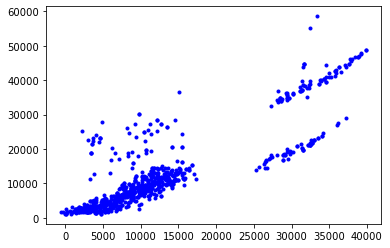

In [28]:
plt.plot(model_re.predict(X_re), y, 'b.')

In [29]:
model_re.score(X_re, y)

0.7396711805805427

In [30]:
model_re.coef_[0:3]

array([235.42378293, 279.76579137, 328.1851105 ])

In [31]:
X_cat_2[0:5,:]

array([[1., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0.]])

In [32]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [33]:
model_re.coef_[3:]

array([    50.7908963 ,    -50.7908963 , -12152.96734521,  12152.96734521,
          514.20793498,     54.1394287 ,   -238.45755094,   -329.88981275])